# Notebook sulla classificazione con gli alberi di classificazione

>In questo notebook continuamo la nostra analisi dati sul dataset prendendo alcuni risultati ottenuti dalla cluster analysis.
L'idea è quella di costruire un albero di decisione che replichi i risultati ottenuti al punto precedente.
Anche in questo caso cominciamo con importare gli strumenti necessari come **Sklearn** dove useremo l'oggetto di tipo DecisionTreeClassifier per costruire un albero di decisione e alcuni strumenti per visualizzare l'albero e la matrice di confusione.
Non usiamo particolari strategie per la divisione del dataset, quindi riordiniamo i dati del dataset in modo casuale e li ripartizioniamo  al 70% per il training set e il restante 30% per il test set.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import itertools
import graphviz 
from sklearn import tree
from sklearn.preprocessing import StandardScaler
#from scikitplot.metrics import plot_confusion_matrix
%matplotlib inline

In [2]:
from path import Path
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
INTERIM_DIR = DATA_DIR / "interim"
filename1 = INTERIM_DIR / "datasetClassification.csv"
filename2 = INTERIM_DIR / "datasetClassification2.csv"
filename3 = INTERIM_DIR / "datasetClassificazione.csv"
filename4 = INTERIM_DIR / "datasetUnione.csv"
print(filename1)
print(filename2)
print(filename3)

C:\Users\matte\dmo_progetto\data\interim\datasetClassification.csv
C:\Users\matte\dmo_progetto\data\interim\datasetClassification2.csv
C:\Users\matte\dmo_progetto\data\interim\datasetClassificazione.csv


In [3]:
ds = pd.read_csv(filename1)

## Definizione dei metodi di classificazione

>Abbiamo scritto un metodo che costruisce un albero di decisione usando il  DecisionTreeClassifier di Sklearn, che utilizza il metodo CART.

>L'albero prende come parametri:
* la misura di impurità (gini, entropia, misclassification)
* il numero di livelli per limitare il problema dell'overfitting
* le eticchete di classe
* il training e il test set
* la variabile target per il training e il test set


> Sulla base di questi elementi il DecisionTreeClassifier costruisce un albero, dopodiché lo valutiamo e lo disegnamo con la libreria **graphviz**

In [28]:
def DecisionTree(measure,n_levels, type_class, dataset, class_labels, target_name, training_set, target_train, test_set, target_test):
    decisionTree = DecisionTreeClassifier(criterion=measure, max_depth = n_levels)
    #print (target_train)
    decisionTree.fit(training_set, target_train)

    #predizione sulla variabile target sia per il training set e test set
    target_train_pred = decisionTree.predict(training_set) # risposte per la variabile target con il traning set
    target_test_pred = decisionTree.predict(test_set)  # risposte per la variabile target con il test set
    
    #TreeEval(target_train, target_test,target_train_pred, target_test_pred, class_labels)
    if(type_class==0):
        TreeEval(target_train, target_test,target_train_pred, target_test_pred, class_labels) #valutazione del modello
    else:
        TreeEvalBinary(target_train, target_test,target_train_pred, target_test_pred,class_labels)
    #valutazione del modello
    #disegno dell'albero
    dotfile = open("tree.dot", 'w')
    #export_graphviz(tree, out_file = dotfile, feature_names = dataset.columns.drop(target_name),class_names=class_labels, rounded=True, filled=True)            
    #dotfile.close()
    dot_data = tree.export_graphviz(decisionTree, out_file=None, 
                    feature_names=dataset.columns.drop(target_name),  
                    class_names=class_labels,  
                  filled=True, rounded=True,  
                 special_characters=True)  

    graph = graphviz.Source(dot_data)  
    return graph 
    

# Definizione dei metodi di valutazione

Questo metodo valuta l'albero di decisione.
**TreeEval** valuta un albero di decisione nel caso non sia usato per un problema di classificazione binaria, in tal caso verrà calcolato sola misura della **Accuracy** e la **matrice di confunsione** per il **training e test set.**

In [5]:
def TreeEval(targert_train, target_set,target_train_pred, target_test_pred, class_labels):
    accuracy_train = accuracy_score(targert_train,  target_train_pred)
    accuracy_test = accuracy_score(target_set, target_test_pred)
    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
    plot_confusion_matrix(confusion_matrix(targert_train, target_train_pred),class_labels,
                          title="Matrice di confusione per il Training Set",normalize=False)
    plot_confusion_matrix(confusion_matrix(target_set, target_test_pred), class_labels,
                          title="Matrice di confusione per il Test Set",normalize=False)
   

In [22]:
def TreeEvalBinary(targert_train, target_set,target_train_pred, target_test_pred,class_labels):
    accuracy_train = accuracy_score(targert_train,  target_train_pred)
    accuracy_test = accuracy_score(target_set, target_test_pred)
    recall_train = recall_score(targert_train,  target_train_pred)
    recall_test = recall_score(target_set, target_test_pred)
    precision_train = recall_score(targert_train,  target_train_pred)
    precision_test = recall_score(target_set, target_test_pred)
    f1_train = f1_score(targert_train,  target_train_pred)
    f1_test = f1_score(target_set, target_test_pred)
    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
    print("RECALL: TRAIN=%.4f TEST=%.4f" % (recall_train, recall_test))
    print("PRECISION: TRAIN=%.4f TEST=%.4f" % (precision_train, precision_test))
    print("F1_SCORE: TRAIN=%.4f TEST=%.4f" % (f1_train, f1_test))
    plot_confusion_matrix(confusion_matrix(targert_train, target_train_pred),class_labels,
                          title="Matrice di confusione per il Training Set",normalize=False)
    plot_confusion_matrix(confusion_matrix(target_set, target_test_pred), class_labels,
                          title="Matrice di confusione per il Test Set",normalize=False)

In [6]:
#data["Scuola_provenienza"] = data["Scuola_provenienza"].cat.codes astype('category')
#ds["Genere"] = ds["Genere"].astype('category')
#ds["Genere"] = ds["Genere"].cat.codes
dataset = ds.drop("cluster", axis=1).values
target = ds["cluster"].values

# Matrice di confusione

In [7]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Classificazione carriera studenti in base a background

>Abbiamo costruito l'albero di decisione usando come misura di impurità il **gini**, usando le colonne: **coorte, scuola di provenienza, genere e voto_test**, la variabile di risposta è **cluster** che rappresenta i risultati ottenuti del clustering gerarchico con il metodo average link usando solo gli esami.
Ricordiamo che il clustering aveva trovato i seguenti gruppi di studenti:
* nel cluster 0 ci sono gli studenti che hanno dato tutti gli esami
* nel cluster 1 ci sono gli studenti che hanno dato ASD e PRG
* nel cluster 2 ci sono gli studenti che non hanno dato esami
* nel cluster 3 ci sono gli studenti che hanno dato solo ASD
* nel cluster 4 ci sono gli studenti che hanno dato ASD,ARC e AN1

>L'albero dovrebbe cercare di individuare a quale cluster appartiene uno studente conoscendo i suoi dati di background.

In [8]:
ds = pd.read_csv(filename1)
training_set, test_set, target_train, target_test = train_test_split(dataset, target, test_size=0.3, random_state=42)
dataset = ds.drop("cluster", axis=1).values
target = ds["cluster"].values

In [9]:
#class_names = ["AL", "IA","IP", "IPC", "IT","LC","LL","LS","TC","XX"]
class_names = ["0","1","2","3","4"]

ACCURACY: TRAIN=0.6751 TEST=0.5735


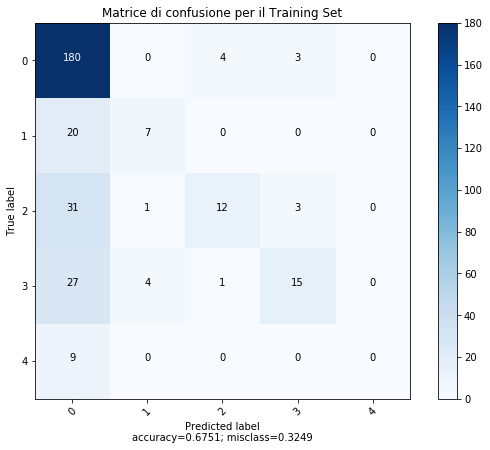

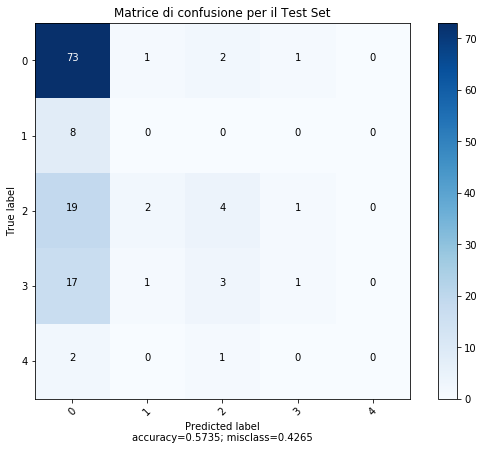

In [10]:
DecisionTree("gini",4,0, ds,class_names,"cluster", training_set, target_train, test_set, target_test)

## Commento sui risultati ottenuti

>Con questa configurazione abbiamo ottenuto una accuracy del 68% per il training set mentre del 57% per il test set.
Dalle matrici di confusione possiamo osservare che il modello classifica abbastanza accuratamente gli studenti del cluster 0, mentre ottiene pochi risultati corretti riguardo gli altri cluster.
In generale il modello tende a classificare la maggior parte degli studenti nel cluster 0, essendo molto più grande.
Il modello non è quindi in grado di predire la carriera degli studenti.

## Altro esempio di classificazione

In [30]:
#ds2 = pd.read_csv(filename2)
#class_names2 = ["0","1","2","3","4","5"]
#dataset2 = ds2.drop("cluster", axis=1).values
#target2 = ds2["cluster"].values

In [38]:
#training_set2, test_set2, target_train2, target_test2 = train_test_split(dataset2, target2, test_size=0.3, random_state=42)
#DecisionTree("gini", 4,0, ds2,class_names2,"cluster", training_set2, target_train2, test_set2, target_test2)

## Previsione svolgimento esame di MDL

>Dalle operazioni di clustering e analisi associativa abbiamo potuto osservare che l'esame di MDL è quello a cui gli studenti danno priorità minore.
In questa sezione verifichiao se è possibile predire se uno studente ha dato l'esame di MDL, conoscendo altri dati della sua carriera. In particolare abbiamo preso in considerazione le variabili **Coorte**, **Voto_test**, **ASD**, e **AN1**.

In [13]:
#ds3 = pd.read_csv(filename3)
#dataset3 = ds3.drop("Scuola_provenienza", axis=1).values
#target3 = ds3["Scuola_provenienza"].values
#ds3["Genere"] = ds3["Genere"].astype('category')
#ds3["Genere"] = ds3["Genere"].cat.codes
#class_names3 = ["AL", "IA","IP", "IPC", "IT","LC","LL","LS","TC","XX"]
#training_set3, test_set3, target_train3, target_test3 = train_test_split(dataset3, target3, test_size=0.3, random_state=42)
#DecisionTree("gini", 3,0, ds3,class_names3,"Scuola_provenienza", training_set3, target_train3, test_set3, target_test3)

In [36]:
ds4 = pd.read_csv(filename4)
ds4 = ds4[["Coorte", "Voto_test", "ASD", "AN1", "MDL"]]
shape = ds4.shape
for i in range(0,shape[0]):
    if(ds4["MDL"][i]==0):
        ds4["MDL"][i]=-1
    else:
        ds4["MDL"][i]=1

C:\Users\matte\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\matte\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ACCURACY: TRAIN=0.8644 TEST=0.7647
RECALL: TRAIN=0.8861 TEST=0.7361
PRECISION: TRAIN=0.8861 TEST=0.7361
F1_SCORE: TRAIN=0.8669 TEST=0.7681


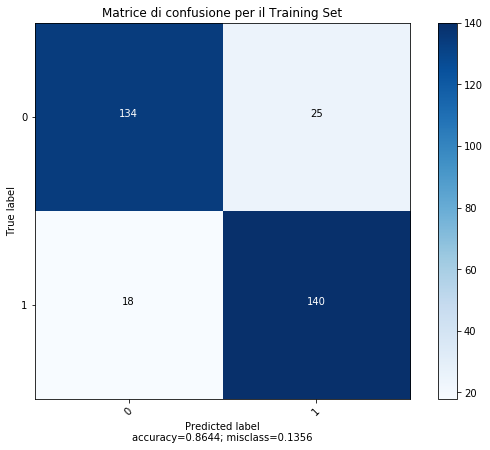

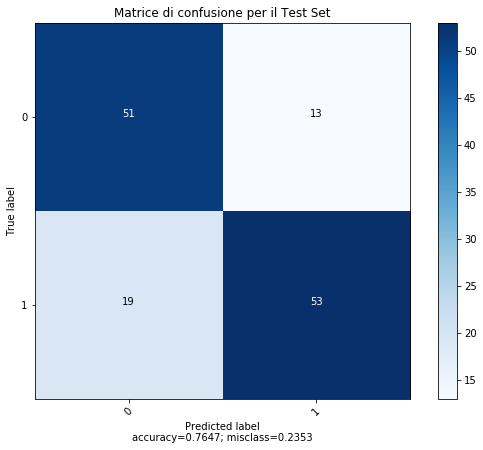

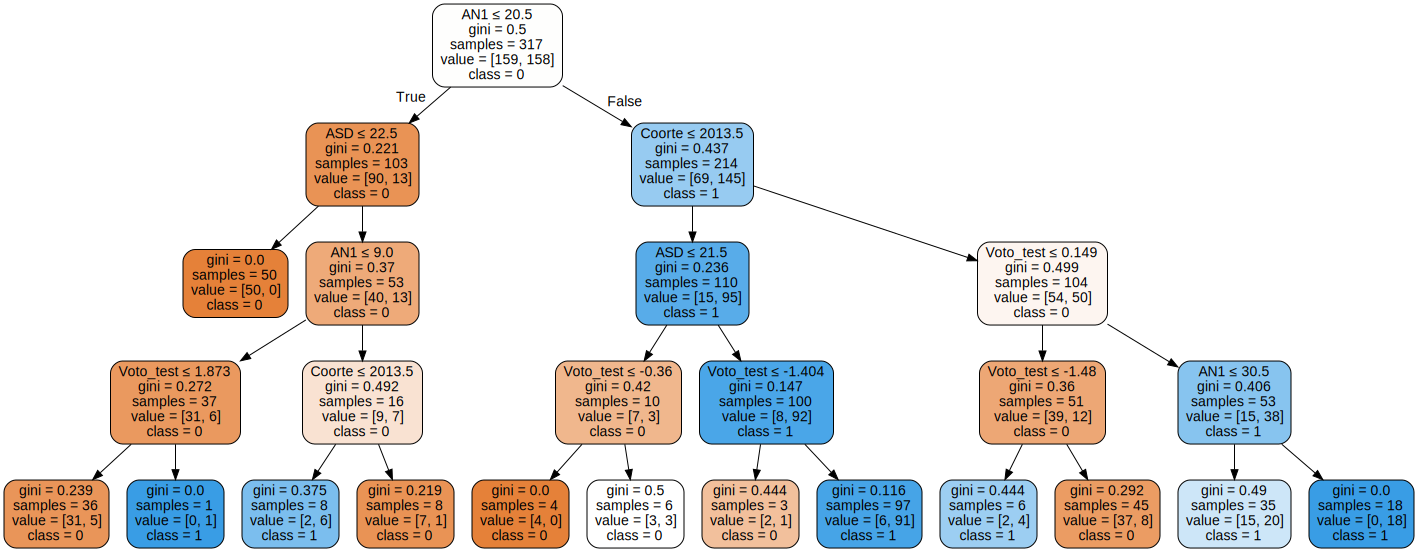

In [37]:
dataset4 = ds4.drop("MDL", axis=1).values
target4 = ds4["MDL"].values
class_names4 = ["0", "1"]
training_set4, test_set4, target_train4, target_test4 = train_test_split(dataset4, target4, test_size=0.3, random_state=42)
DecisionTree("gini", 4,1, ds4,class_names4,"MDL", training_set4, target_train4, test_set4, target_test4)

## Commento sui risultati ottenuti

>Con questa configurazione abbiamo ottenuto una accuracy dell'85% per il training set e del 77% per il test set.
Possiamo osservare che il modello classifica in modo corretto la maggior parte degli studenti. Apparentemente è quindi possibile predire se uno studente svolgerà l'esame di MDL entro l'anno, conoscendo i suoi dati.